<a href="https://colab.research.google.com/github/sara9190/sara9190/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Early Start: {'A': 0, 'B': 3, 'C': 7, 'D': 3, 'E': 3, 'F': 4}
Early Finish: {'A': 3, 'B': 7, 'C': 10, 'D': 4, 'E': 6, 'F': 7}
Late Start: {'F': 4, 'E': 3, 'D': 3, 'C': 7, 'B': 3, 'A': 0}
Late Finish: {'F': 7, 'E': 6, 'D': 4, 'C': 10, 'B': 7, 'A': 3}
Total Float: {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
Critical Path: ['A', 'B', 'C', 'D', 'E', 'F']


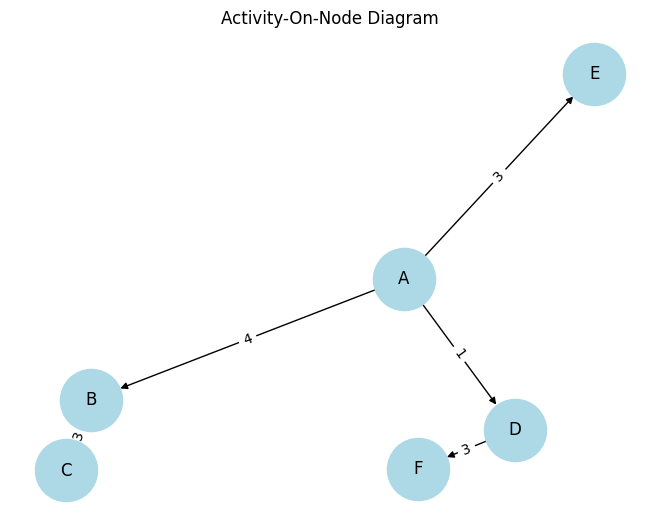

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def forward_pass(activities):
    early_start = {}
    early_finish = {}
    for activity, details in activities.items():
        dependencies = details['dependencies']
        if not dependencies:  # No dependencies
            early_start[activity] = 0
        else:
            early_start[activity] = max(early_finish[dep] for dep in dependencies)
        early_finish[activity] = early_start[activity] + details['duration']
    return early_start, early_finish

def backward_pass(activities, early_finish):
    late_start = {}
    late_finish = {}
    last_activity = max(early_finish, key=early_finish.get)
    for activity in reversed(list(activities.keys())):
        if activity == last_activity:
            late_finish[activity] = early_finish[activity]
        else:
            dependents = [k for k, v in activities.items() if activity in v['dependencies']]
            if dependents:
                late_finish[activity] = min(late_start[dep] for dep in dependents)
            else:
                late_finish[activity] = early_finish[activity]  # Default to early finish if no dependents
        late_start[activity] = late_finish[activity] - activities[activity]['duration']
    return late_start, late_finish

def calculate_float(early_start, late_start):
    total_float = {activity: late_start[activity] - early_start[activity] for activity in early_start}
    critical_path = [activity for activity, tf in total_float.items() if tf == 0]
    return total_float, critical_path

def visualize_graph(activities):
    G = nx.DiGraph()
    for activity, details in activities.items():
        for dep in details['dependencies']:
            G.add_edge(dep, activity, duration=details['duration'])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'duration')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Activity-On-Node Diagram")
    plt.show()

# Define the project activities
activities = {
    'A': {'duration': 3, 'dependencies': []},
    'B': {'duration': 4, 'dependencies': ['A']},
    'C': {'duration': 3, 'dependencies': ['B']},
    'D': {'duration': 1, 'dependencies': ['A']},
    'E': {'duration': 3, 'dependencies': ['A']},
    'F': {'duration': 3, 'dependencies': ['D']}
}

# Step 1: Perform Forward Pass
early_start, early_finish = forward_pass(activities)

# Step 2: Perform Backward Pass
late_start, late_finish = backward_pass(activities, early_finish)

# Step 3: Calculate Float and Critical Path
total_float, critical_path = calculate_float(early_start, late_start)

# Step 4: Display Results
print("Early Start:", early_start)
print("Early Finish:", early_finish)
print("Late Start:", late_start)
print("Late Finish:", late_finish)
print("Total Float:", total_float)
print("Critical Path:", critical_path)

# Step 5: Visualize the Project Graph
visualize_graph(activities)
